# XGBoost

- 트리 기반의 앙상블 기법
- 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여준다.
- XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
- 병렬 CPU 환경에서 빠르게 학습이 가능하다.

In [40]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
boston = load_boston()
diabetes = load_diabetes()

## 파이썬 기반의 XGBoost

In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 123)

dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [19]:
params = {
    "max_depth" : 3,
    "eta" : 0.1,
    "objective" : "binary:logistic",
    "eval_metric" : "logloss",
    "early_stopping" : 100
}

num_rounds = 400

evals = [(dtrain, "train"), (dtest, "eval")]

In [20]:
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                     early_stopping_rounds = 100, evals = evals)

[20:50:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32222	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.

In [26]:
predict = xgb_model.predict(dtest)
print(np.round(predict[:5], 3))

[1.    0.999 0.001 0.995 0.001]


In [30]:
preds = [1 if x > 0.5 else 0 for x in predict]
print(preds[:5])

[1, 1, 0, 1, 0]


In [31]:
print("Accuracy : {}".format(accuracy_score(y_test, preds)))
print("Precision : {}".format(precision_score(y_test, preds)))
print("Recall : {}".format(recall_score(y_test, preds)))

Accuracy : 0.9736842105263158
Precision : 0.972972972972973
Recall : 0.9863013698630136


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

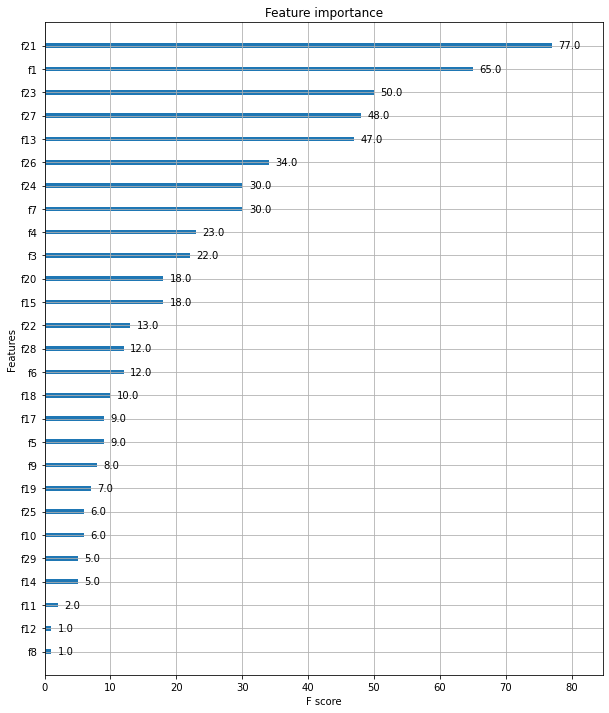

In [32]:
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)

## XGBClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 123)

In [38]:
iris_xgb_c = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
iris_xgb_c.fit(X_train, y_train)
predict= iris_xgb_c.predict(X_test)
preds_proba = iris_xgb_c.predict_proba(X_test)[:, 1]

[21:12:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
cross_val = cross_validate(estimator = iris_xgb_c,
                          X = iris.data, y =iris.target,
                          cv = 5)

print("average fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("average score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("average test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

[21:16:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

## XGBRegressor

In [41]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 123)

In [47]:
boston_xgb_r = XGBRegressor(n_estimators = 400, learning_rate = 0.1, max_depth = 3, objective = "reg:squarederror")
boston_xgb_r.fit(X_train, y_train)
predict = boston_xgb_r.predict(X_test)

In [48]:
cross_val = cross_validate(estimator = boston_xgb_r,
                          X = boston.data, y = boston.target,
                          cv = 5)

print("average fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("average score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("average test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

average fit time : 0.23576855659484863 (+/- 0.01052768634722715)
average score time : 0.0043925285339355465 (+/- 0.0004937021339039942)
average test score : 0.6884390736705599 (+/- 0.1649974770303876)


# LightGBM

- 빠른 학습과 예측 시간
- 더 적은 메모리를 사용
- 범주형 특징의 자동 변환과 최적 분할

In [49]:
from lightgbm import LGBMClassifier, LGBMRegressor

## LGBMClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 123)

In [54]:
iris_lgbm_c = LGBMClassifier(n_estimators = 400)
evals = [(X_test, y_test)]

iris_lgbm_c.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss",
               eval_set = evals, verbose = True)

preds = iris_lgbm_c.predict(X_test)

[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

In [55]:
cross_val = cross_validate(estimator = iris_lgbm_c,
                          X = iris.data, y = iris.target,
                          cv = 5)

print("average fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("average score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("average test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

average fit time : 0.08836226463317871 (+/- 0.022800041188044403)
average score time : 0.0011981964111328126 (+/- 0.00039904127199602926)
average test score : 0.9600000000000002 (+/- 0.04898979485566355)


## LGBMRegressor

In [56]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 123)

In [62]:
iris_lgbm_r = LGBMRegressor(n_estimators = 400)
evals = [(X_test, y_test)]

iris_lgbm_r.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss",
               eval_set = evals, verbose = True)

preds = iris_lgbm_r.predict(X_test)

[1]	valid_0's l2: 71.4897
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	valid_0's l2: 22.6387
[37]	valid_0's l2: 22.4443
[38]	valid_0's l

In [63]:
cross_val = cross_validate(estimator = iris_lgbm_r,
                          X = iris.data, y = iris.target,
                          cv = 5)

print("average fit time : {} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("average score time : {} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("average test score : {} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

average fit time : 0.040889549255371097 (+/- 0.011544457810488554)
average score time : 0.001197481155395508 (+/- 0.00039939917374915297)
average test score : 0.33774514353971224 (+/- 0.4161241862637303)
